In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import os

In [9]:
path=os.getcwd()
df = pd.read_csv(path+'/diabetes.csv') # change the loc 

/Users/ronnieasatourian/Desktop/Dvin


In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


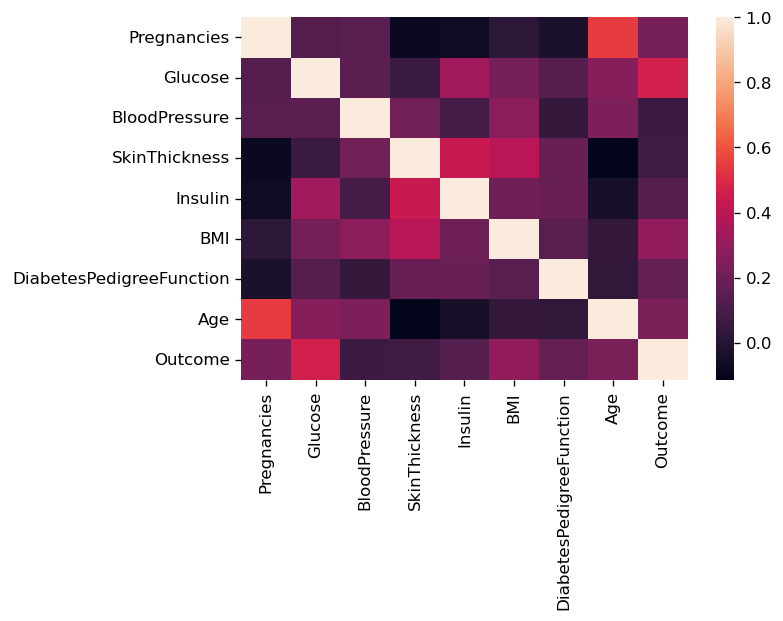

In [11]:
plt.figure(dpi=120)
sns.heatmap(df.corr());

#Correlation Matrix

In [13]:
df.info();

#Gives out the information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot:xlabel='Outcome', ylabel='count'>

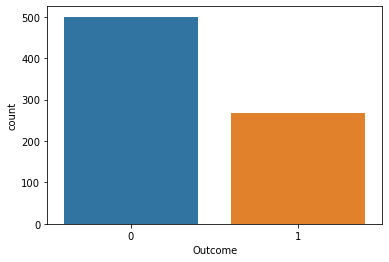

In [12]:
sns.countplot(data=df,x='Outcome') #No need to balance the data but if needed SMOTENC technique can be used 

In [17]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

min_max_scaler = preprocessing.MinMaxScaler()  #Whats minmax scaler normalization
scaled_X_train = min_max_scaler.fit_transform(X_train)
scaled_X_test = min_max_scaler.transform(X_test)




knn = KNeighborsClassifier()
knn.fit(scaled_X_train,y_train.values)
y_pred = knn.predict(scaled_X_test)

y_pred_proba = knn.predict_proba(scaled_X_test)

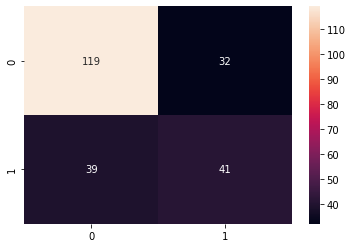

In [14]:
cnf_matrix = confusion_matrix(y_test,y_pred) #CONFUSION MATRIX

sns.heatmap(cnf_matrix, annot=True,fmt='g');

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       151
           1       0.56      0.51      0.54        80

    accuracy                           0.69       231
   macro avg       0.66      0.65      0.65       231
weighted avg       0.69      0.69      0.69       231



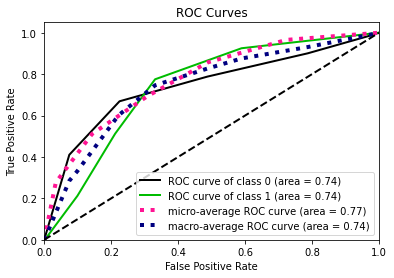

In [26]:
skplt.metrics.plot_roc(y_test, y_pred_proba)
plt.show();